# Section 4.5.1 Application to kernel spectral clustering

This page contains simulations in Section 4.5.1.

## Contents

    - Non-informative eigenvector of $L$
    - Separation with covariance trace information
    - Implementation on MNIST data
    - Data preprecessing
    - $\alpha$-$\beta$ inner-product kernels on Gaussian data
    - $\alpha$-$\beta$ inner-product kernels on EEG data
    - Data preprecessing

## Non-informative eigenvector of $L$

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from tensorflow.keras.datasets import mnist
pi = np.pi

In [ ]:
coeff = 4
p = 512*coeff
n = 128*coeff

cs = [1/4, 1/4, 1/2]
k = len(cs) # nb of classes

test_case = 'means'

if test_case == 'means':
    means = lambda i : np.concatenate([np.zeros(i-1),[1],np.zeros(p-i)])*5
    covs  = lambda i : np.eye(p)

if test_case == 'var':
    means = lambda i : np.zeros(p)
    covs  = lambda i : np.eye(p)*(1+(-1)**(i)/np.sqrt(p)*5)

if test_case == 'orth':
    means = lambda i : np.zeros(p)
    covs  = lambda i : scipy.linalg.toeplitz([(4**(i-1)/10)**j for j in range(p)])

if test_case == 'mixed':
    means = lambda i : np.concatente([-np.ones(p/2),np.ones(p/2)])/np.sqrt(p)
    covs  = lambda i : np.eye(p)*(1+(i-1)/np.sqrt(p)*10)

np.random.seed(1004)
X=np.zeros( (p,n) )
for i in range(k):
    X[:,int(np.sum(cs[:i])*n):int(np.sum(cs[:i+1]*n))]=scipy.linalg.sqrtm(covs(i+1))@np.random.randn(p,int(cs[i]*n))+means(i+1).reshape(p,1)
    
XX = X.T@X

tau = 2
f = lambda t : 4*(t-tau)**2-(t-tau)+4
K = f((-2*XX+np.diag(XX).reshape(n,1)+np.diag(XX).reshape(1,n))/p)

D = np.diag(np.sum(K,axis=0))
L = n*np.diag(1/np.sqrt(np.diag(D)))@K@np.diag(1/np.sqrt(np.diag(D)))

eigs_L,V = np.linalg.eigh(L)
ind = np.argsort(eigs_L)
eigs_L = eigs_L[ind]
V = V[:,ind]

edges = np.linspace(np.min(eigs_L[:-1])-.5,np.max(eigs_L[:-1])+.5,100)

plt.figure()
plt.hist(eigs_L[:-1],bins=edges,weights=1/(n-1)/(edges[1]-edges[0])*np.ones(n-1),label=r'Eigenvalues of $L$')
plt.annotate(xy=(5.55,.2),xytext=(5.55,.4),text=r'Eig. 3')
plt.legend()

plt.figure()
for i in range(1,5):    
    plt.subplot(4,1,i)
    if i == 3:
        plt.plot(V[:,n-i],'r')
    else:
        plt.plot(V[:,n-i],'b')

    plt.xlabel('Eigenvector '+str(i))

## Separation with covariance trace information

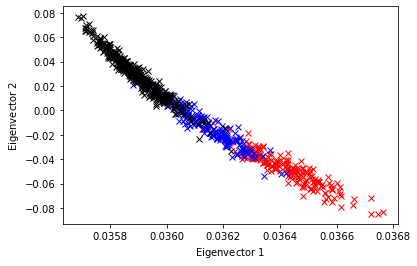

In [68]:
coeff = 6
p = 512*coeff
n = 128*coeff

cs = [1/4, 1/4, 1/2]
k = len(cs) # nb of classes

test_case = 'var'

if test_case == 'means':
    means = lambda i : np.concatenate([np.zeros(i-1),[1],np.zeros(p-i)])*5
    covs  = lambda i : np.eye(p)

if test_case == 'var':
    means = lambda i : np.zeros(p)
    covs  = lambda i : np.eye(p)*(1+4*(i-1)/np.sqrt(p))

if test_case == 'orth':
    means = lambda i : np.zeros(p)
    covs  = lambda i : scipy.linalg.toeplitz([(4**(i-1)/10)**j for j in range(p)])

if test_case == 'mixed':
    means = lambda i : np.concatente([-np.ones(p/2),np.ones(p/2)])/np.sqrt(p)
    covs  = lambda i : np.eye(p)*(1+(i-1)/np.sqrt(p)*10)
    
np.random.seed(928)
X=np.zeros( (p,n) )
for i in range(k):
    X[:,int(np.sum(cs[:i])*n):int(np.sum(cs[:i+1]*n))]=scipy.linalg.sqrtm(covs(i+1))@np.random.randn(p,int(cs[i]*n))+means(i+1).reshape(p,1)
    
XX = X.T@X

tau = 0
for a in range(k):
    tau += 2*cs[a]*np.trace(covs(a+1))/p

f = lambda t : 1.5*(t-tau)**2-(t-tau)+5
K = f((-2*XX+np.diag(XX).reshape(n,1)+np.diag(XX).reshape(1,n))/p)

D = np.diag(np.sum(K,axis=0))
L = n*np.diag(1/np.sqrt(np.diag(D)))@K@np.diag(1/np.sqrt(np.diag(D)))

eigs_L,V = np.linalg.eigh(L)
ind = np.argsort(eigs_L)
eigs_L = eigs_L[ind]
V = V[:,ind]

v1 = V[:,-1]
v2 = V[:,-2]
v3 = V[:,-3]

if test_case == 'means':
    plt.figure()
    plt.plot(v2[:int(n*cs[0])],v3[:int(n*cs[0])],'rx')
    plt.plot(v2[int(n*cs[0]):-int(n*cs[2])],v3[int(n*cs[0]):-int(n*cs[2])],'bx')
    plt.plot(v2[int(n-n*cs[2]):],v3[int(n-n*cs[2]):],'kx')
    plt.xlabel(r'Eigenvector $2$')
    plt.ylabel(r'Eigenvector $3$')

if test_case == 'var':
    plt.figure()
    plt.plot(v1[:int(n*cs[0])],v2[:int(n*cs[0])],'rx')
    plt.plot(v1[int(n*cs[0]):-int(n*cs[2])],v2[int(n*cs[0]):-int(n*cs[2])],'bx')
    plt.plot(v1[int(n-n*cs[2]):],v2[int(n-n*cs[2]):],'kx')
    plt.xlabel(r'Eigenvector $1$')
    plt.ylabel(r'Eigenvector $2$')

## Implementation on MNIST data

In [69]:
n = 192

cs = [1/3,1/3,1/3]
k = len(cs) # nb of classes

(init_data, init_labels), _ = mnist.load_data()

idx_init_labels = np.argsort(np.array(init_labels))
    
labels = init_labels[idx_init_labels]
init_data = init_data[idx_init_labels,:,:]
data = np.transpose(init_data.reshape(np.shape(init_data)[0],np.shape(init_data)[1]*np.shape(init_data)[2]))
init_n,p=np.shape(data)[1],np.shape(data)[0]

selected_labels=[0,1,2] # selected digits: must be of size 'k'

## Data preprocessing

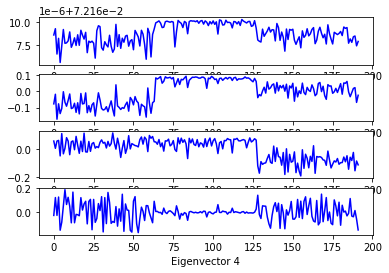

In [70]:
data = data/data.max()
mean_data=np.mean(data,axis=1).reshape(len(data),1)

norm2_data=0
for i in range(init_n):
    norm2_data+=1/init_n*np.linalg.norm(data[:,i]-mean_data)**2

data=np.mat((data-mean_data)/np.sqrt(norm2_data)*np.sqrt(p))

selected_data = []

for i in range(len(selected_labels)):
    selected_data.append(data[:,[ x for x in range(init_n) if labels[x]==selected_labels[i] ] ])
    if i==0:    
        cascade_selected_data = selected_data[-1]
    else:
        np.concatenate([cascade_selected_data,selected_data[-1]],axis=1)

# recentering of the k classes
mean_selected_data  = np.mean(cascade_selected_data,axis=1).reshape(len(cascade_selected_data),1)
norm2_selected_data = np.mean(np.sum(np.power(np.abs(cascade_selected_data-mean_selected_data),2)))

for j in range(len(selected_labels)):
    selected_data[j]=(selected_data[j]-mean_selected_data)/np.sqrt(norm2_selected_data)*np.sqrt(p)

means = lambda l : np.mean(selected_data[l],axis=1)
covs  = lambda l : 1/np.shape(selected_data[l])[1]*(selected_data[l]@selected_data[l].T)-means(l)@means(l).T

X= np.zeros((p,n))
for i in range(k): # random data picking
    data = selected_data[i][:,np.random.permutation(np.shape(selected_data[i])[1])]
    X[:,int(np.sum(cs[:i])*n):int(np.sum(cs[:i+1])*n)]=data[:,:int(n*cs[i])] 
    
XX=X.T@X
K=np.exp(-1/2/p*(-2*XX+np.diag(XX).reshape(n,1)+np.diag(XX).reshape(1,n)))

D = np.diag(np.sum(K,axis=0))
L = n*np.diag(1/np.sqrt(np.diag(D)))@K@np.diag(1/np.sqrt(np.diag(D)))

eigs_L,V = np.linalg.eigh(L)
ind = np.argsort(eigs_L)
eigs_L = eigs_L[ind]
V = V[:,ind]

plt.figure()
for i in range(1,5):
    plt.subplot(4,1,i)
    plt.plot(V[:,n-i],'b')
    plt.xlabel('Eigenvector '+str(i))

## $\alpha$-$\beta$ inner-product kernels on Gaussian data

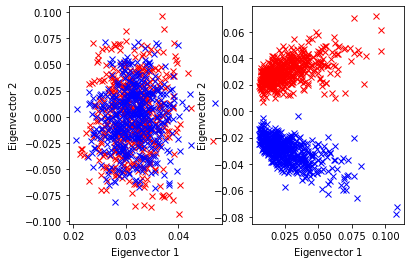

In [75]:
coeff = 1
p = 400*coeff
n = 1000*coeff

cs = [1/2,1/2]
k = len(cs) # nb of classes

np.random.seed(928)
Z = []
for i in range(k):
    Z.append(np.random.randn(p,p//2))

means = lambda i : np.zeros(p)
covs  = lambda i : .1*np.eye(p) + 2*Z[i]@Z[i].T/p

covs_mean = cs[0]*covs(0) + cs[1]*covs(1)
tau = 2*np.trace(covs_mean)/p


X = np.zeros((p,n))
for i in range(k):
    X[:,int(np.sum(cs[:i])*n):int(np.sum(cs[:i+1]*n))]=np.real(scipy.linalg.sqrtm(covs(i)))@np.random.randn(p,int(cs[i]*n))+means(i).reshape(p,1)

XX = X.T@X

K1= np.exp(-(-2*XX+np.diag(XX).reshape(n,1)+np.diag(XX).reshape(1,n))/p)
K2 =((-2*XX+np.diag(XX).reshape(n,1)+np.diag(XX).reshape(1,n))/p-2)**2


eigs_K1,V1 = np.linalg.eigh(K1)
eigs_K2,V2 = np.linalg.eigh(K2)
ind = np.argsort(eigs_K1)
V1 = V1[:,ind]
ind = np.argsort(eigs_K2)
V2 = V2[:,ind]

v1_1 = V1[:,-1]
v1_2 = V1[:,-2]

v2_1 = V2[:,-1]
v2_2 = V2[:,-2]

plt.figure()
plt.subplot(1,2,1)
plt.plot(v1_1[:int(n*cs[0])],v1_2[:int(n*cs[0])],'rx')
plt.plot(v1_1[int(n*cs[0]):],v1_2[int(n*cs[0]):],'bx')
plt.xlabel(r'Eigenvector $1$')
plt.ylabel(r'Eigenvector $2$')

plt.subplot(1,2,2)
plt.plot(v2_1[:int(n*cs[0])],v2_2[:int(n*cs[0])],'rx')
plt.plot(v2_1[int(n*cs[0]):],v2_2[int(n*cs[0]):],'bx')
plt.xlabel(r'Eigenvector $1$')
plt.ylabel(r'Eigenvector $2$')
_ = plt.show()

## $\alpha$-$\beta$ inner-product kernels on EEG data